# Data Exploration of Final Year Project
## Alex Fisher


### Preparation
First, import the libraries:

In [1]:
import os #listdir function to get files
import matplotlib.pyplot as plt #for plotting graphs
import numpy as np #for arrays and matrices operations

Now, read all filedata

In [2]:
fileData = [] #array to store contents of each results file

for fileName in os.listdir("data"): #for each file in the data folder
    with open("data/" + fileName) as file: #iterate through each file
        fileData.append(file.read()) #add the file's contents to the array
        file.close() #close the file

Split the filedata into separate level data

In [3]:
rawResults = [] #array to hold each level

for chunk in fileData: #for each file
    for line in chunk.split("\n"): #for each line in each file
        if len(line) > 0: #if the line contains data (this is to remove the last line which is empty)
            rawResults.append(line) #append the line to the array

Split the levels into arrays of data

In [4]:
splitResults = [] #array to hold each split level

for notSplit in rawResults: #for each level
    splitResults.append(notSplit.split(" ")) #split the level into an array of strings

Convert each level array into the correct data types and create two numpy arrays - one of unsorted, and one of sorted data. Print the first five elements to make sure it worked correctly

In [5]:
results = [] #array to hold each level

for result in splitResults: #for each level
    converted = [] #create an array to hold the converted data
    for i in range(7): #for each data point in the level
        if i == 6: #if the index is 6, convert the point to a boolean
            if result[i] == "true":
                converted.append(True)
            else:
                converted.append(False)
        elif i == 4 or i == 5: #if the index is 4 or 5, convert the point to an int after stripping the last
             converted.append(int(result[i][:-2])) #two characters
        else:
            converted.append(int(result[i])) #otherwise, simply convert the point to an int
    results.append(converted) #add the converted level to the results
    
data = np.asarray(results) #turn the results into a numpy array
sortedData = data[np.argsort(data[:,0])] #sort the array by the first column

print("Not Sorted: \n") #print the data in both unsorted and sorted
for pt in range(5):
    print(*data[pt])

print("\nSorted: \n")
for pt in range(5):
    print(*sortedData[pt])

Not Sorted: 

46 29 -378576128 1 4245 4245 0
100 98 -1889023232 12 7488 125 1
48 19 827437824 1 3967 3967 0
80 80 -461999360 39 16792 325 1
32 10 674704640 1 5473 5473 0

Sorted: 

0 0 -495157504 1 943 943 0
0 0 -1022731520 1 921 921 0
0 0 155054848 1 875 875 0
0 0 -1138672640 1 882 882 0
1 0 1272693248 1 919 919 0


### Plotting the data

First, plot a graph of actual difficulty versus perceived difficulty

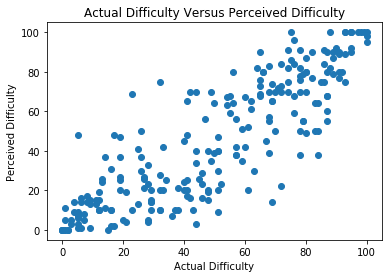

In [6]:
plt.scatter(data[:,0], data[:,1]) #plot the first column against the second column as a scatter graph
plt.title("Actual Difficulty Versus Perceived Difficulty") #label the title and axes
plt.xlabel("Actual Difficulty") #this fairly self explanatory so there will be no comments for this part of
plt.ylabel("Perceived Difficulty") #each graph creation
plt.show() #plot the graph

Calculate the average perceived difficulty value for each unique actual difficulty and plot it

In [7]:
unique, value = np.unique(sortedData[:,0], return_counts=True) #get each unique actual difficulty value
avgDict = {}                                                   #and the number of times it occurs
#create a dictionary to store the sum of the perceived difficulty for each unique value of actual difficulty

for n in range(np.size(sortedData, 0)): #for each data point
    if sortedData[n][0] in avgDict: #if the actual difficulty as a key already exists in the dictionary
        avgDict[sortedData[n][0]] += sortedData[n][1] #add the data point's perceived difficulty to the value
    else: #if the actual difficulty is not in the dictionary
        avgDict[sortedData[n][0]] = sortedData[n][1] #set the actual difficulty as a key with it's corresponding
                                                     #perceived difficulty as the value
actual = np.asarray(unique) #turn the actual difficulties into a numpy array
perceivedAvg = np.asarray(list(avgDict.values())) / value #turn sum of perceived difficulties into a numpy array,
                                                          #then divide that array by the counts to get average
distance = np.abs(perceivedAvg - actual) #calculate the absolute distance of the perceived difficulty from it's
                                         #corresponding actual difficulty

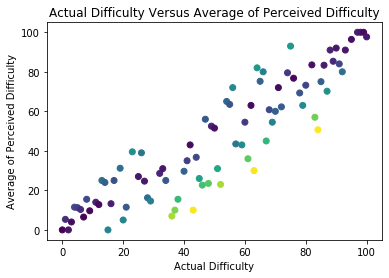

In [8]:
plt.scatter(actual,perceivedAvg,c=distance) #graph plot where the color is set to match the calculated distance
plt.title("Actual Difficulty Versus Average of Perceived Difficulty")
plt.xlabel("Actual Difficulty")
plt.ylabel("Average of Perceived Difficulty")
plt.show()

Plot actual difficulty versus attempts, with attempts ending in forfeit marked as yellow

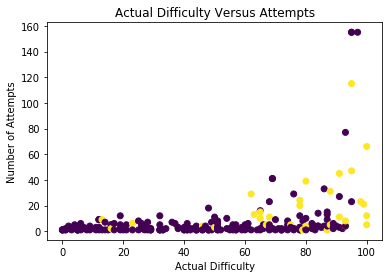

In [9]:
plt.scatter(sortedData[:,0], sortedData[:,3], c=sortedData[:,6]) #graph color uses the forfeit column
plt.title("Actual Difficulty Versus Attempts")
plt.xlabel("Actual Difficulty")
plt.ylabel("Number of Attempts")
plt.show()

Plot number of attempts versus time taken in seconds

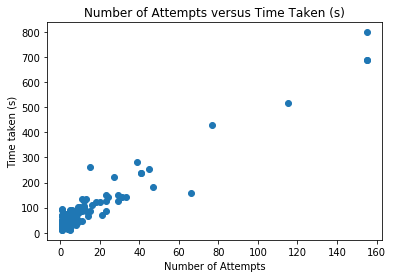

In [10]:
plt.scatter(sortedData[:,3], sortedData[:,4] / 60) #divide by 60 for seconds
plt.title("Number of Attempts versus Time Taken (s)")
plt.xlabel("Number of Attempts")
plt.ylabel("Time taken (s)")
plt.show()

Plot number of attempts versus time taken on the last attempt, with forfeit attempts removed

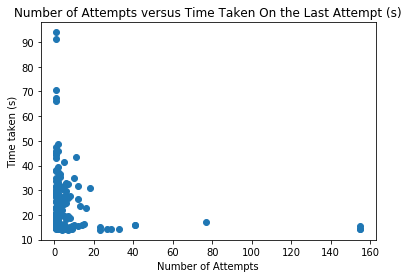

In [11]:
#get a new array with the rows containing a forfeit value of true removed
forfeitRemoved = sortedData[sortedData[:,6] != True]
#plot the data using that array
plt.scatter(forfeitRemoved[:,3], forfeitRemoved[:,5] / 60)
plt.title("Number of Attempts versus Time Taken On the Last Attempt (s)")
plt.xlabel("Number of Attempts")
plt.ylabel("Time taken (s)")
plt.show()

Plot the level seed versus perceived difficulty

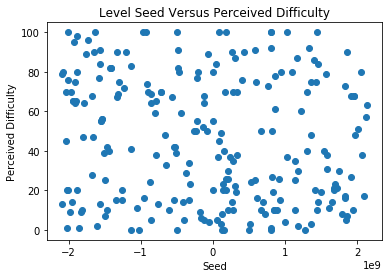

In [12]:
plt.scatter(sortedData[:,2], sortedData[:,1]) #graph plot
plt.title("Level Seed Versus Perceived Difficulty")
plt.xlabel("Seed")
plt.ylabel("Perceived Difficulty")
plt.show()

Calculate the sum of the attempts for each unique difficulty and plot as a bar chart

In [13]:
sumDict = {} #dict to store the actual difficulties and their sums of attempts

for n in range(np.size(sortedData, 0)): #exact same code as for average
    if sortedData[n][0] in sumDict:
        sumDict[sortedData[n][0]] += sortedData[n][3]
    else:
        sumDict[sortedData[n][0]] = sortedData[n][3]

#this time, do not divide by counts, simply take sum
attemptSum = np.asarray(list(sumDict.values()))

Limit the y axis so that the large value isn't fully shown, as to more clearly resolve detail

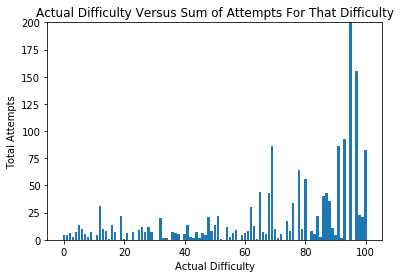

In [14]:
plt.bar(actual, attemptSum) #graph plot
plt.ylim(0,200) #limit the graph y axis to resolve higher detail
plt.title("Actual Difficulty Versus Sum of Attempts For That Difficulty")
plt.xlabel("Actual Difficulty")
plt.ylabel("Total Attempts")
plt.show()